In [ ]:
import ogstools as ogs
from template import prj_from_template

param = {"mun": 1.e-3,
         "muw": 1.e-3,
         "K": 1e-10,
         "phi": 0.3,
         "lambda": 2,
         "Pe": 5000,
         "pc0": 5000.0,
         "pci": 5.e4}

template_file = r"TwoPhase_mcwt_line.template"
prj_file = r"TwoPhase_mcwt_line_test.prj"

prj_from_template(param, template_file, prj_file)

prj = ogs.Project(input_file=prj_file, output_file=prj_file)
prj.run_model()

In [ ]:
from mcworther import BrooksCorey
from mcworther import McWorther

model = BrooksCorey(pd=param["Pe"], lambda_=param["lambda"])


pc_0 = param["pc0"]
pc_i = param["pci"]

S0 = model.Sw(pc_0)
Si = model.Sw(pc_i)

print(f"S0 = {S0}, Si = {Si:.3f}")

problem = McWorther(model, 
                    phi=param["phi"],
                    K=param["K"],
                    muw=param["muw"],
                    mun=param["mun"],
                    S0=S0,
                    Si=Si)

['capillary_pressure', 'gas_pressure', 'saturation']


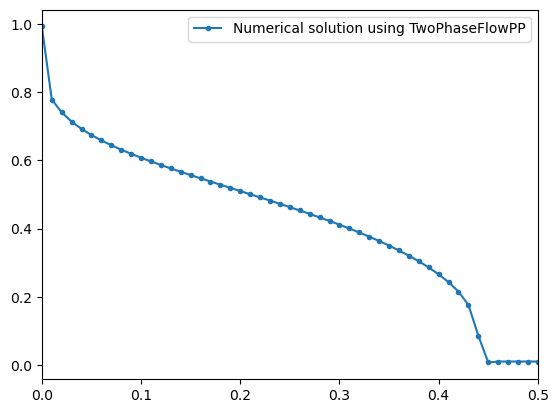

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv

mesh = pv.read("twophaseflow_test_t_1000.000000.vtu")#

print(mesh.point_data.keys())

Sw=mesh["saturation"]
x=mesh.points[:,0]

ind = np.argsort(x)
x = x[ind]
Sw = Sw[ind]


# 1. Plot analytical solution
problem.plot_solution()

# 2. Plot numerical solution
plt.plot(x, Sw, '.-', label="Numerical solution using TwoPhaseFlowPP")

plt.xlim([0, 0.5])

plt.legend()
plt.show()